# Webscrapping meat commodities prices

<h>

## Main objective is to get words in bitcoin sites, separate and count words in order and make a word cloud

<h>

### The task of this script is as follow:

<h>

- setting URL and search word
- getting URL texts
- converting texts into lower cases and taking out symbols such as ".', ";"
- import stopwords and apply
- split text into words and count numbers
- order by great to minor

<hr>

### Introduction

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
<hr>
Word clouds are widely used for analyzing data from social network websites

<hr>

### Installing packages

<h>

In [ ]:
pip install wordcloud

In [ ]:
pip install spaCy

In [ ]:
pip install -U spacy

<h>

### Installing libraries

<h>

In [1]:
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

<hr>

### Settting URL

In [22]:
topic="bitcoin"
numResults=50000
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

### Ordering html text via Beautiful Soup

In [23]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>
<html lang="en-BR"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>bitcoin - Google Search</title><script nonce="YQhs7qY5WwI5aQQN0ETGGA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};
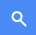
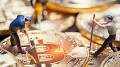
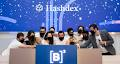
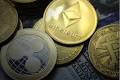
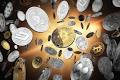
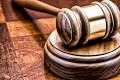
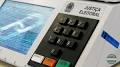
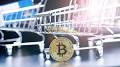
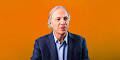
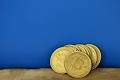
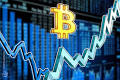
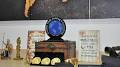
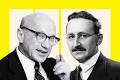
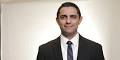
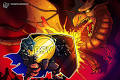
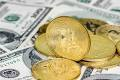
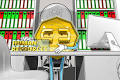
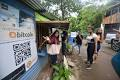
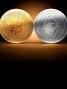
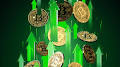
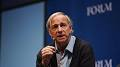
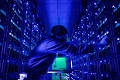
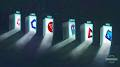
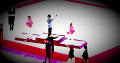
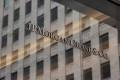
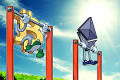
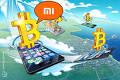
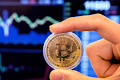
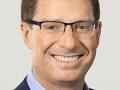
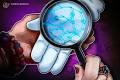
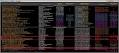
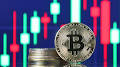

In [24]:
soup

### Extracting text from Soup

In [25]:
results = soup.find_all("div", attrs = {"class": "ZINbbc"})
site_text = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            site_text.append(description)
    except:
        continue

In [6]:
site_text

['1 day ago · SÃO PAULO – O Bitcoin volta a ganhar força nesta sexta-feira (6), em um dia positivo para o mercado de criptomoedas como um todo,...',
 '5 hours ago · A moeda recua agora para US$ 43.430, acumulando um ganho mensal de 33%, segundo o CoinMarketCap. Com a valorização de hoje, o bitcoin diminui...',
 '6 hours ago · O Bitcoin vem ganhando enorme popularidade em 2021, quando a crise financeira estourou no mundo todo. Desde então, mais e mais pessoas...',
 '7 hours ago · O bitcoin surpreendeu o mercado nos últimos dias, superando a marca de US$ 39 mil, o que corresponde a aproximadamente R$ 200 mil.',
 '1 day ago · Nesta semana cheia de novidades no mercado cripto brasileiro, damos as boas-vindas ao Hashdex Nasdaq Bitcoin Reference Price Fundo de Índice...',
 "3 hours ago · O Ministério Público Federal (MPF) deuninciou Cláudio José de Oliveira, conhecido como 'Rei do Bitcoin', pelos crimes de estelionato,...",
 '3 hours ago · Sheldon McIntyre, do FXStreet, por exemplo, disse qu

##### Based on the parameters from Step 3, add the Text Data to a variable of your choice. Here, we are adding the data into variable "text"

### But "descriptions" is a tuple of string of texts. We have to re-order to a one-text structure. Will use "join" function

In [26]:
all_text = "".join(site_text)

In [8]:
all_text 

'1 day ago · SÃO PAULO – O Bitcoin volta a ganhar força nesta sexta-feira (6), em um dia positivo para o mercado de criptomoedas como um todo,...5 hours ago · A moeda recua agora para US$ 43.430, acumulando um ganho mensal de 33%, segundo o CoinMarketCap. Com a valorização de hoje, o bitcoin diminui...6 hours ago · O Bitcoin vem ganhando enorme popularidade em 2021, quando a crise financeira estourou no mundo todo. Desde então, mais e mais pessoas...7 hours ago · O bitcoin surpreendeu o mercado nos últimos dias, superando a marca de US$ 39 mil, o que corresponde a aproximadamente R$ 200 mil.1 day ago · Nesta semana cheia de novidades no mercado cripto brasileiro, damos as boas-vindas ao Hashdex Nasdaq Bitcoin Reference Price Fundo de Índice...3 hours ago · O Ministério Público Federal (MPF) deuninciou Cláudio José de Oliveira, conhecido como \'Rei do Bitcoin\', pelos crimes de estelionato,...3 hours ago · Sheldon McIntyre, do FXStreet, por exemplo, disse que os investidores novatos dev

### Now, the step is to transform all the words in lower case, as later the algorithm can differentiate between "If" and "if", for example

In [27]:
all_text = all_text.lower()

In [ ]:
all_text

### Creating a dictionary of symbols that won't be useful for our purpose here

In [28]:
symbols = [';', ':', '!', "*",'.',',',' · ']

In [29]:
for i in symbols :
    all_text = all_text.replace(i, '')

In [ ]:
all_text

### Importing library of Stopwords

*Step 2. Analyse text to create a word cloud*
We need to clean the data before we generate a word cloud.
Convert all words to lower case
Identify all adjectives … you can add nouns, pronouns into the mix if you prefer
Remove all the stop words. These are words such as “a”, “the”, “we” …etc. They are frequent and does not hold any use information. They are simply the glue that holds a language together

‘stopwords’ is a list of words that do not add much meaning to the sentence (e.g. ‘a’, ‘but’)
<hr>
‘word_tokenize’ splits up a sentence into its tokens i.e. words and punctuations
<hr>
‘sent_tokenize’ splits up a paragraph into its respective sentences

In [12]:
# Importing the required libraries
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stop_en = set(stopwords.words('english'))

In [31]:
stop_pt = set(stopwords.words('portuguese'))

In [32]:
stop_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


### Applying Stopwords to the text

In [33]:
all_text_excstopwen = " ".join([word for word in all_text.split(' ') if word not in stop_pt])

In [34]:
clean_text = " ".join([word for word in all_text_excstopwen.split(' ') if word not in stop_en])

### Splitting text into words

In [35]:
clean_text = clean_text.split(' ')

In [ ]:
clean_text

### Counting the number of words

In [36]:
# Initializing Dictionary
d = {}

# Count number of times each word comes up in list of words (in dictionary)
for word in clean_text:
    if word not in d:
        d[word] = 0
    d[word] += 1

In [ ]:
d

### Ordering the list of words

In [37]:
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))
word_freq.sort(reverse=True)

In [38]:
word_freq

[(70, 'bitcoin'),
 (40, 'day'),
 (21, 'weeks'),
 (20, 'hours'),
 (19, 'agobitcoin'),
 (17, 'days'),
 (17, 'agoo'),
 (12, 'us$'),
 (12, 'mercado'),
 (9, '(btc)'),
 (8, 'mil'),
 (8, 'cryptocurrency'),
 (7, 'week'),
 (7, 'queda'),
 (7, 'criptomoedas'),
 (7, 'agoa'),
 (6, 'price'),
 (6, 'digital'),
 (5, 'pode'),
 (5, 'exchange'),
 (5, 'crypto'),
 (5, 'ceo'),
 (5, 'bitcoins'),
 (4, 'us'),
 (4, 'segundo'),
 (4, 'network'),
 (4, 'nesta'),
 (4, 'mining'),
 (4, 'ether'),
 (4, 'etf'),
 (4, 'dias'),
 (4, 'could'),
 (4, 'btc'),
 (4, 'agothe'),
 (4, 'agoos'),
 (4, '30'),
 (4, ''),
 (3, 'últimos'),
 (3, 'últimas'),
 (3, 'valor'),
 (3, 'têm'),
 (3, 'trading'),
 (3, 'terça-feira'),
 (3, 'tax'),
 (3, 'support'),
 (3, 'r$'),
 (3, 'preço'),
 (3, 'parte'),
 (3, 'novo'),
 (3, 'negociado'),
 (3, 'mundo'),
 (3, 'move'),
 (3, 'moeda'),
 (3, 'million'),
 (3, 'may'),
 (3, 'maiores'),
 (3, 'maior'),
 (3, 'like'),
 (3, 'level'),
 (3, 'investidores'),
 (3, 'hashdex'),
 (3, 'grande'),
 (3, 'first'),
 (3, 'federal')

<hr>

In [ ]:
# https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba
# https://www.codegrepper.com/code-examples/shell/how+to+import+en_core_web_sm